# Graphing Sentiment

This was inspired by the chapter on [Sentiment Analysis](https://bmw9t.gitbooks.io/introduction-to-text-analysis/content/sentiment-analysis/sentiment-analysis.html) in the [Introduction to Text Analysis](https://www.gitbook.com/book/bmw9t/introduction-to-text-analysis/details) by Brandon Walsh and Sarah Horowitz.

## Getting a Text

We start by seeing what texts there are and getting it.

In [1]:
ls

Basic CSV Handling.ipynb             Truths.Concordance.txt
Concordances.ipynb                   Untitled.ipynb
Counting Word Types.ipynb            Untitled1.ipynb
ExampleTable.csv                     Untitled2.ipynb
Hume Enquiry.txt                     Untitled3.ipynb
Python language notes.ipynb          Using TextBlob.ipynb
ScrapeResults.txt                    Web Scraping.ipynb
ScrapeResults.xml                    Web Scraping.ipynb 2
Sentiment Over a Text.ipynb          countdocsmatrix.ipynb*
Teaching IPython to Humanists.ipynb  fortmactweets.may3-4.2016.txt
Truth.Concordance.txt                theText.txt


In [1]:
theText2Use = "Hume Enquiry.txt"
with open(theText2Use, "r") as fileToRead:
    theString = fileToRead.read()
    
print("This string has", len(theString), "characters.")
print(theString[:50])

This string has 366798 characters.
The Project Gutenberg EBook of An Enquiry Concerni


## Tokenizing for sentences

Now we tokenize on sentences (as opposed to words) and see how many there are.

In [3]:
from textblob import TextBlob
theTextB = TextBlob(theString)
theSentsB = theTextB.sentences
totalS = len(theSentsB)
print(totalS)

2096


## Checking a sentence

We can check a sentence or two to see if it worked.

In [6]:
theSentsB[99]

Sentence("And shall we esteem it worthy the labour of a philosopher to
give us a true system of the planets, and adjust the position and order
of those remote bodies; while we affect to overlook those, who, with so
much success, delineate the parts of the mind, in which we are so
intimately concerned?")

## Dividing into sections

Now we divide the list of sentences into as many sections of sentences as you want. This will set what gets graphed. You can change the number of sections by changing the value of "numOfSects".

In [4]:
import math

numOfSects = 20
sentsPerSect = totalS/numOfSects
sentsPerSectInt = math.floor(sentsPerSect)
print(sentsPerSectInt)

104


## Sentiment analysis of each section

For each section we go through the sentences and sum the polarity of each sentence. We are using TextBlob's sentiment analysis tool that gives us a value for each sentence as to how positive (or negative) it is.

In [15]:
listSectPoles = []

for i in range(1,numOfSects + 1):
    startS = i*sentsPerSectInt - sentsPerSectInt
    stopS = i*sentsPerSectInt - 1
    theTotalPole = 0
    for sentence in theSentsB[startS:stopS]:
        theTotalPole += sentence.sentiment.polarity
        
    listSectPoles.append(theTotalPole)
    
print(listSectPoles) 

[7.958172799422797, 7.108675015460731, 5.855381493506493, 5.186788281163282, 7.10031796906797, 6.487098498723499, 9.549639661925374, 7.739700492959421, 6.334841720779223, 2.942965539751253, 8.090270562770563, 9.123671635573423, 12.573383838383835, 14.280713834776341, 6.3360740053597215, 6.173683673469388, 7.081739409400122, 0.05366786807963275, 0.27129794818965947, 6.856801948051947]


In [17]:
len(listSectPoles)

20

## Graphing sentiment over the text

Finally, we graph the summed polarities for each section.

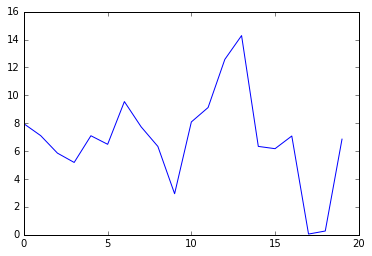

In [16]:
import matplotlib.pyplot as plt
# make sure that graphs are embedded into our notebook output
%matplotlib inline

plt.plot(listSectPoles)

## Next Steps

What can you do next?